In [1]:
# median reduction over lat/long

%matplotlib inline
import mpld3; mpld3.enable_notebook()

from datetime import datetime
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot

/home/sharat910/learn/anaconda2/envs/datacube/lib/python2.7/site-packages/rasterio-0.35.1-py2.7-linux-x86_64.egg/rasterio/warp.py:22: DeprecationWarning: RESAMPLING is deprecated, use Resampling instead.
  "RESAMPLING is deprecated, use Resampling instead.", DeprecationWarning)
/home/sharat910/learn/anaconda2/envs/datacube/lib/python2.7/site-packages/datacube-1.1.0+33.g5e8f4e9.dirty-py2.7.egg/datacube/index/postgres/tables/_schema.py:11: SADeprecationWarning: The SQLAlchemy PostgreSQL dialect has been renamed from 'postgres' to 'postgresql'. The new URL format is postgresql[+driver]://<user>:<pass>@<host>/<dbname>
  from sqlalchemy.dialects import postgres
/home/sharat910/learn/anaconda2/envs/datacube/lib/python2.7/site-packages/osgeo/gdal.py:80: DeprecationWarning: gdal.py was placed in a namespace, it is now available as osgeo.gdal
  DeprecationWarning)


In [2]:
# initialise AE/EE

a = AnalyticsEngine()
e = ExecutionEngine()

In [3]:
# Lake Burley Griffin
dimensions = {'x':    {'range': (79.0, 79.05)},
              'y':    {'range': (30.0, 30.05)},
              'time': {'range': (datetime(1995, 1, 1), datetime(1995, 12, 31))}}

arrays = a.create_array(('LANDSAT_5', 'ledaps'), ['nir'], dimensions, 'get_data')

median = a.apply_expression(arrays, 'median(array1, 1, 2)', 'medianXY')

[u'ls5_ledaps_albers']


In [4]:
median

/home/sharat910/learn/anaconda2/envs/datacube/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/sharat910/learn/anaconda2/envs/datacube/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


{'medianXY': {'array_input': ['get_data'],
  'array_output': {'data_type': u'int16',
   'dimensions': {'time': {'range': (datetime.datetime(1995, 1, 1, 0, 0),
      datetime.datetime(1995, 12, 31, 0, 0))},
    'x': {'range': (79.0, 79.05)},
    'y': {'range': (30.0, 30.05)}},
   'dimensions_order': ['time', 'y', 'x'],
   'no_data_value': -9999,
   'platform': 'LANDSAT_5',
   'product': 'ledaps',
   'result_max': (datetime.datetime(1995, 3, 18, 4, 22, 11),
    1153187.5,
    -7303962.5),
   'result_min': (datetime.datetime(1995, 3, 18, 4, 22, 11),
    1146862.5,
    -7311962.5),
   'shape': (1, 254, 321),
   'variable': 'medianXY'},
  'expression': 'median(get_data, 1, 2)',
  'function': 'median(get_data, 1, 2)',
  'operation_type': 1,
  'orig_function': 'median(array1, 1, 2)'}}

In [5]:
e.execute_plan(a.plan)

plot3D


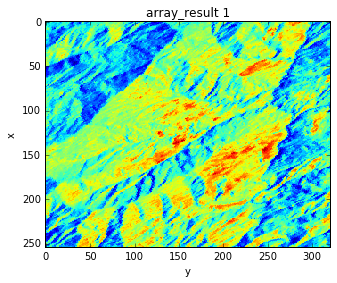

In [6]:
plot(e.cache['get_data'])

plot1D


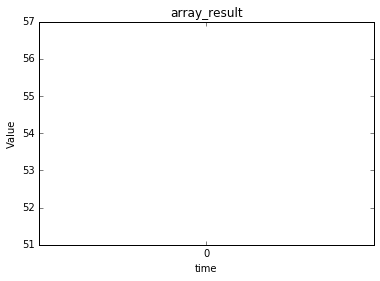

In [7]:
plot(e.cache['medianXY'])